In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
#inline visualization
%matplotlib inline
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
# Load data set
Data = pd.read_excel("Airlines+Data (1).xlsx")

In [3]:
Data.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
df = Data.copy()  # copy the original data

In [6]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
df1 = df.set_index('Month')

In [8]:
df1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [9]:
#month as index

df1 = df.set_index('Month')

In [10]:
df1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


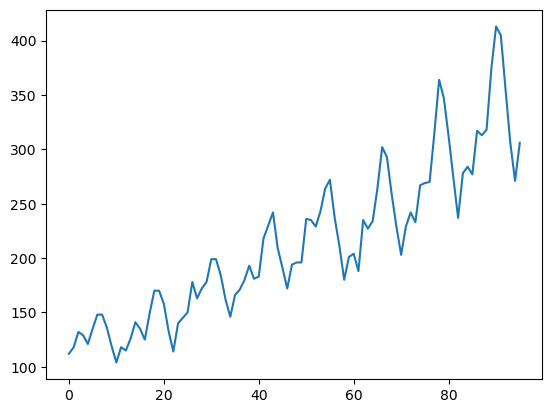

In [6]:
plt.plot(Data['Passengers'])

In [8]:
# First-order difference
Data['First-Order'] = Data['Passengers'].diff(periods=1)
Data

,Month,Passengers,First-Order
0,1995-01-01,112,NaN
1,1995-02-01,118,6.0
2,1995-03-01,132,14.0
3,1995-04-01,129,-3.0
4,1995-05-01,121,-8.0
...,...,...,...
91,2002-08-01,405,-8.0
92,2002-09-01,355,-50.0
93,2002-10-01,306,-49.0
94,2002-11-01,271,-35.0


In [10]:
#Drop na 
Data.dropna(inplace=True)

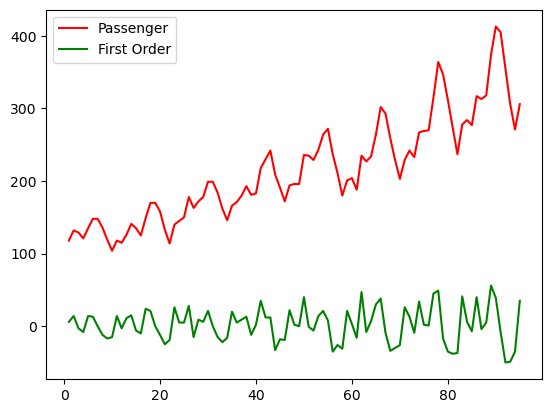

In [11]:
# Plot
plt.plot(Data['Passengers'], color = 'red', label = 'Passenger')
plt.plot(Data['First-Order'], color = 'green', label = 'First Order')
plt.legend()

In [15]:
#Calculate Autocorrelation
acf_values = acf(Data['First-Order'])
acf_values

array([ 1.        ,  0.24719303, -0.15621114, -0.19389898, -0.30091356,
       -0.07659995,  0.04937987, -0.11186081, -0.28940231, -0.12796419,
       -0.14189709,  0.23091956,  0.76784132,  0.2018499 , -0.14879414,
       -0.13854633, -0.23255484, -0.03403639,  0.00806283, -0.09009974])

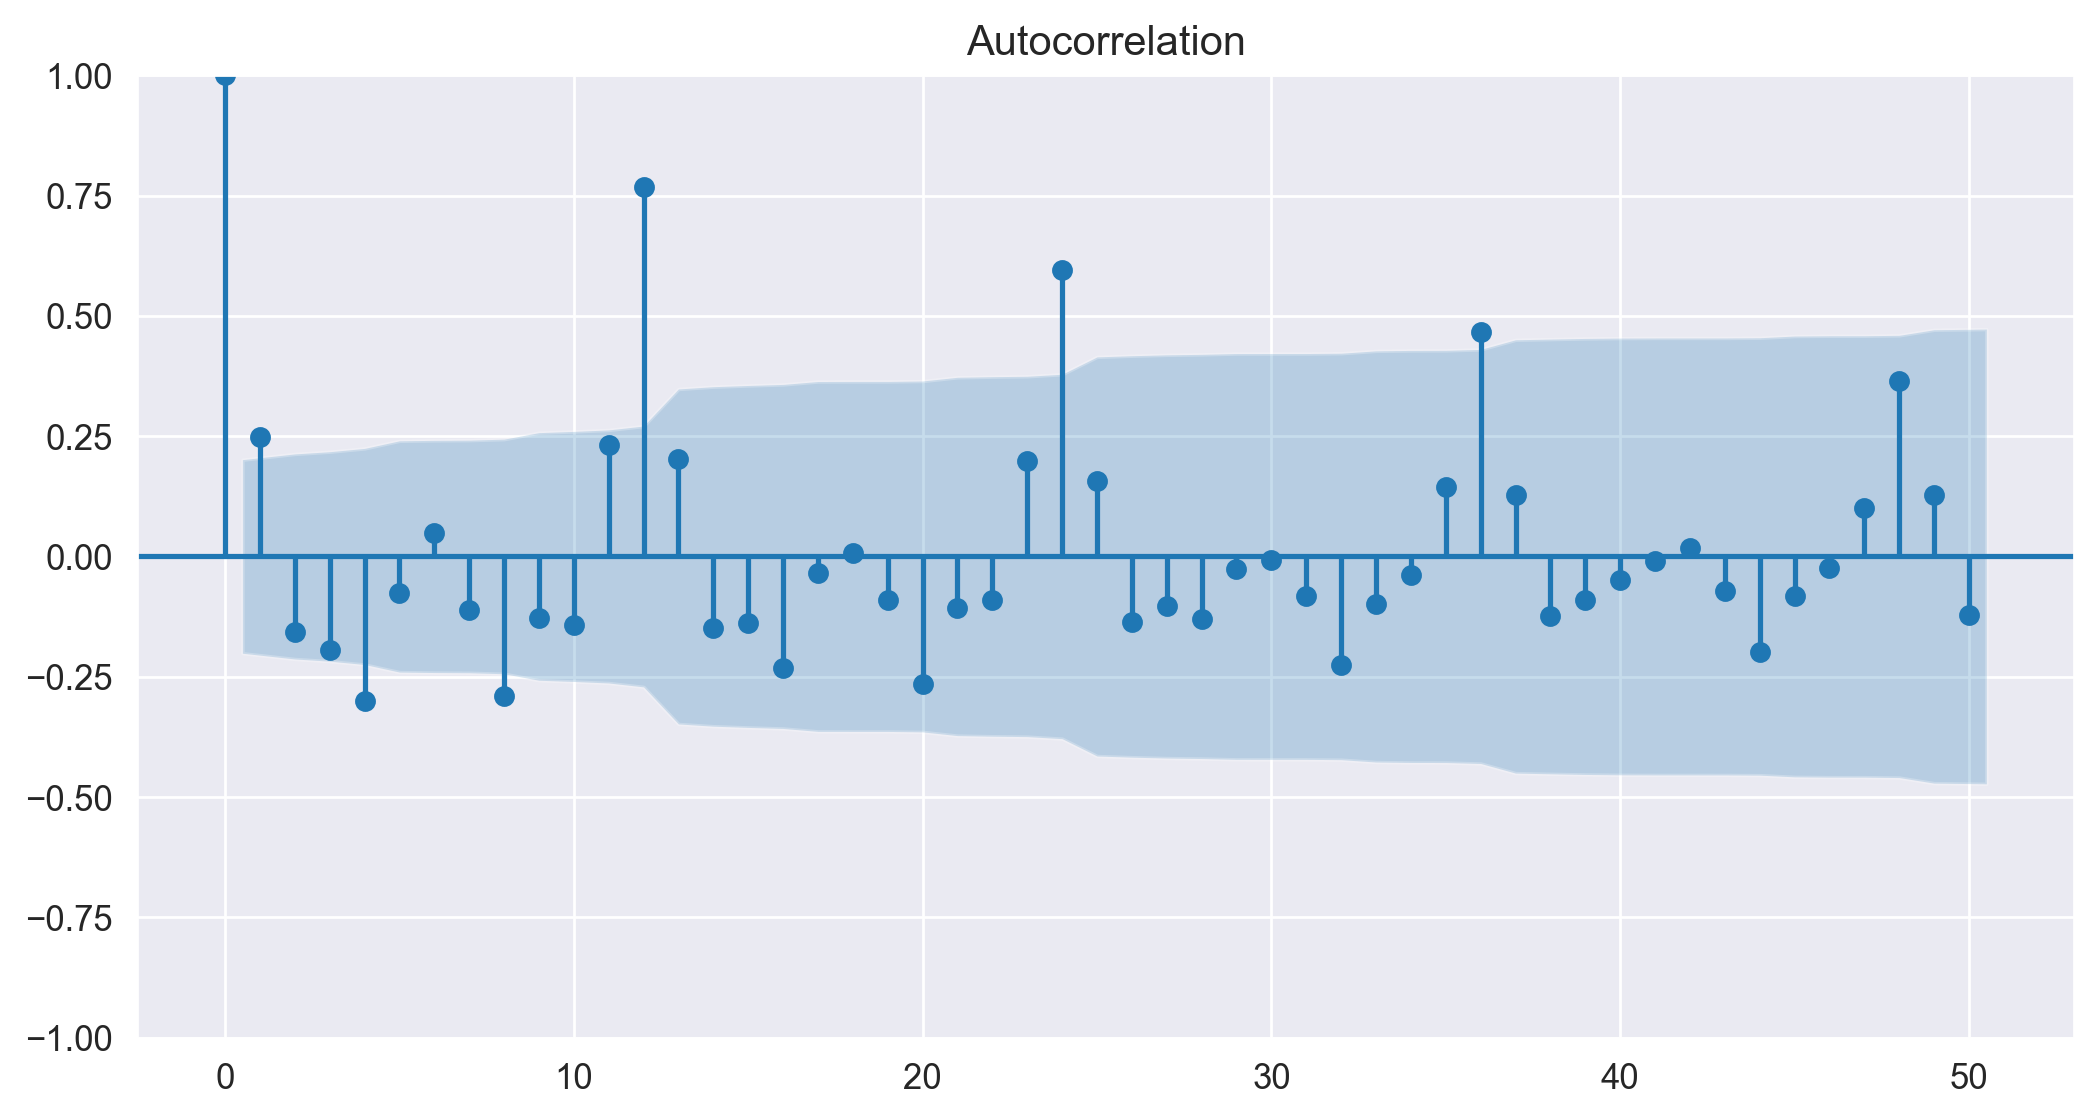

In [18]:
#Plot ACF
plot_acf(Data['First-Order'], lags=50);

In [19]:
#Calculate PACF
pacf_val = pacf(Data['First-Order'])
pacf_val

array([ 1.00000000e+00,  2.49822741e-01, -2.36758342e-01, -1.03692905e-01,
       -3.01485928e-01,  2.23374632e-02, -8.40227411e-02, -2.53404035e-01,
       -4.46435582e-01, -2.23664740e-01, -6.53266123e-01, -3.65821471e-01,
        5.90496055e-01, -1.20748181e-01, -2.79572058e-01,  2.59046851e-01,
        4.43131573e-04, -1.03548748e-01, -2.89705180e-01,  3.92893315e-01])

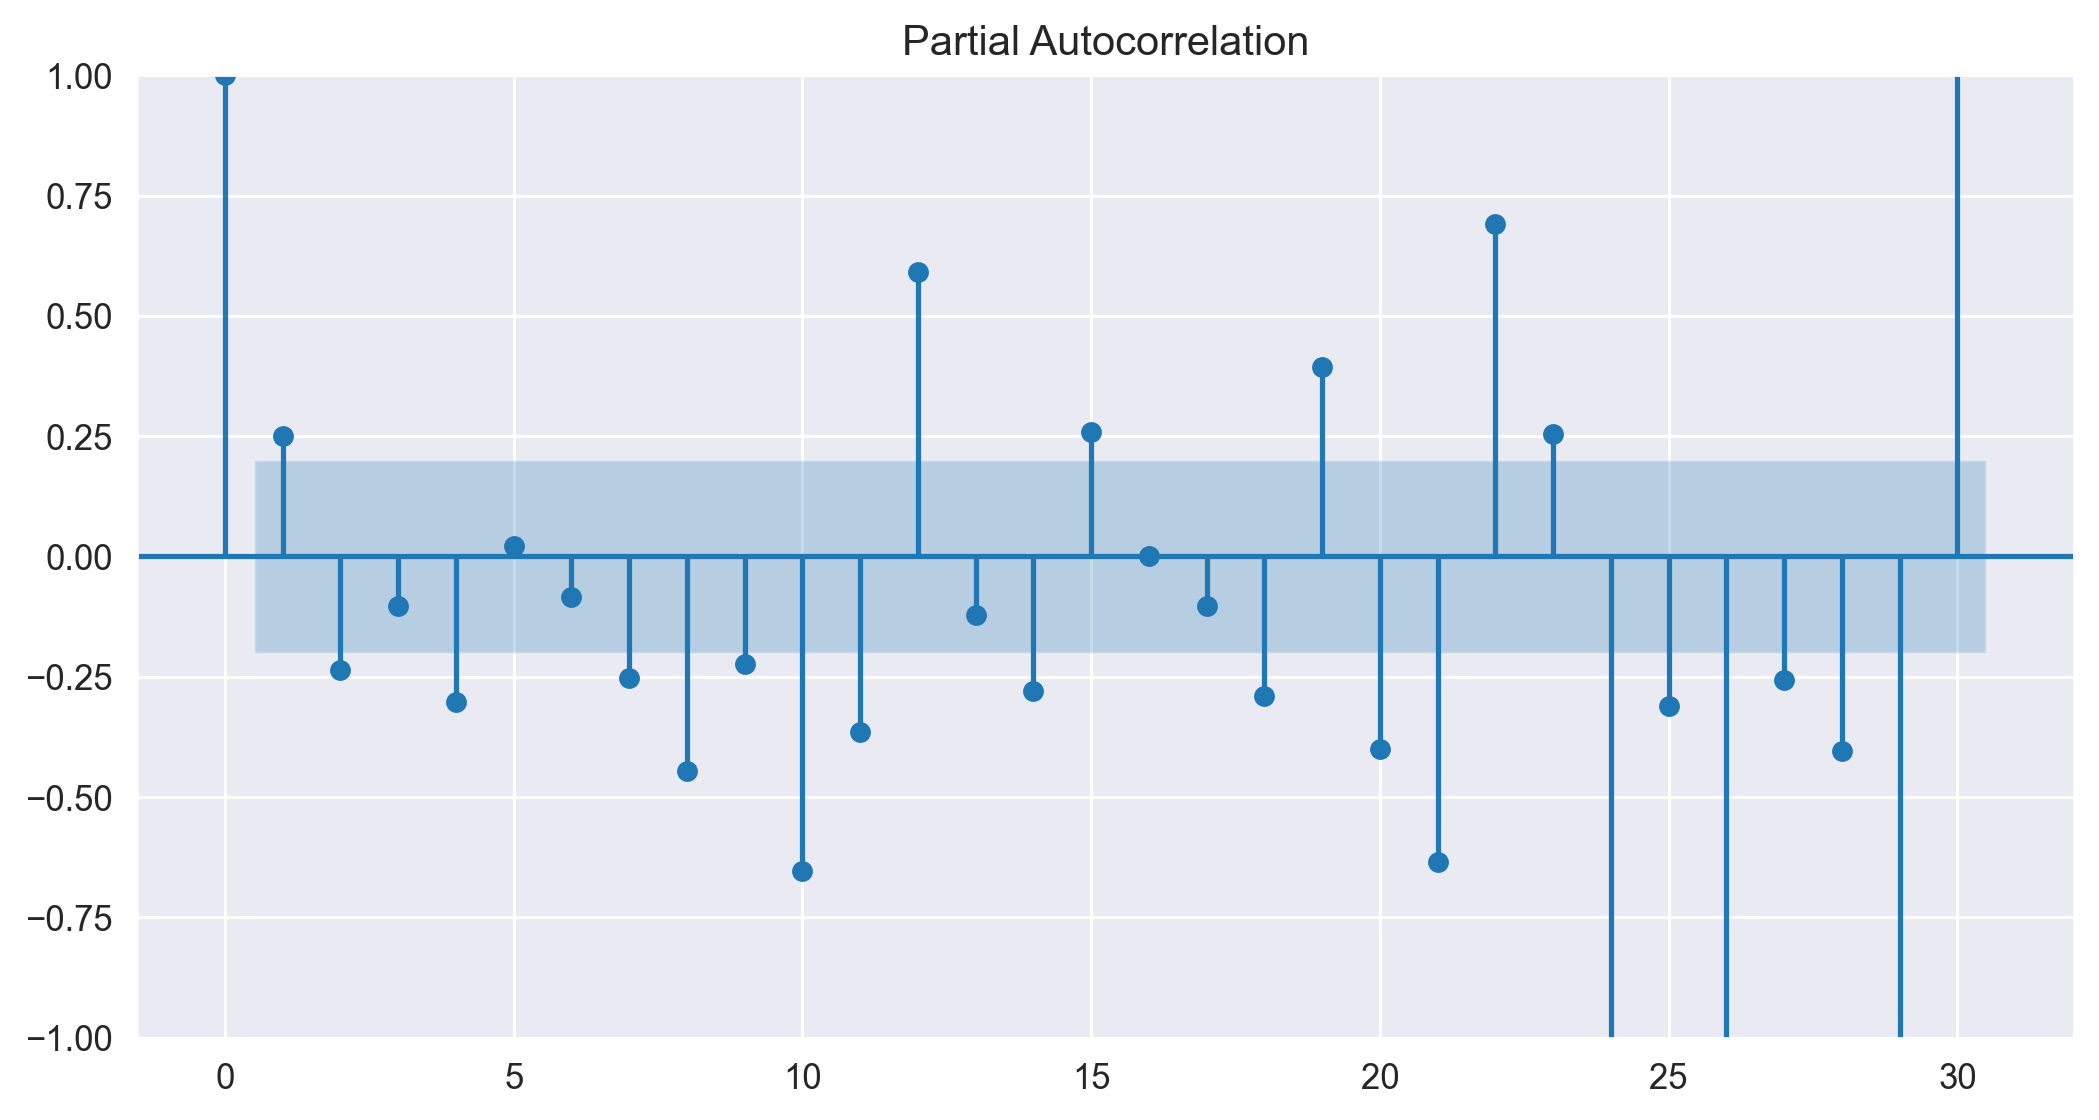

In [20]:
#Plot PACF
plot_pacf(Data['First-Order'], lags=30);

In [11]:
# Square root Transformation

from numpy import sqrt
from pandas import DataFrame

dataframe = DataFrame(df1.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

In [12]:
# Transformation

from numpy import log

dataframe = DataFrame(df1.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

In [13]:
df1["t"] = np.arange(1,97)

df1["t_sq"] = df1["t"]*df1["t"]

df1["log_Passengers"] = np.log(df1["Passengers"])
df1

,Passengers,t,t_sq,log_Passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


In [14]:
#Train data

Train = df1.head(77)

#Test data 

Test = df1.tail(19)

In [15]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.1485443195088

In [16]:
# Exponential Model

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

47.88965425184011

In [17]:
# Quadratic Model

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.92632852818818

In [18]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,])}

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,47.889654
0,rmse_linear,58.148544
2,rmse_Quad,58.926329


# Moving Average

<AxesSubplot:>

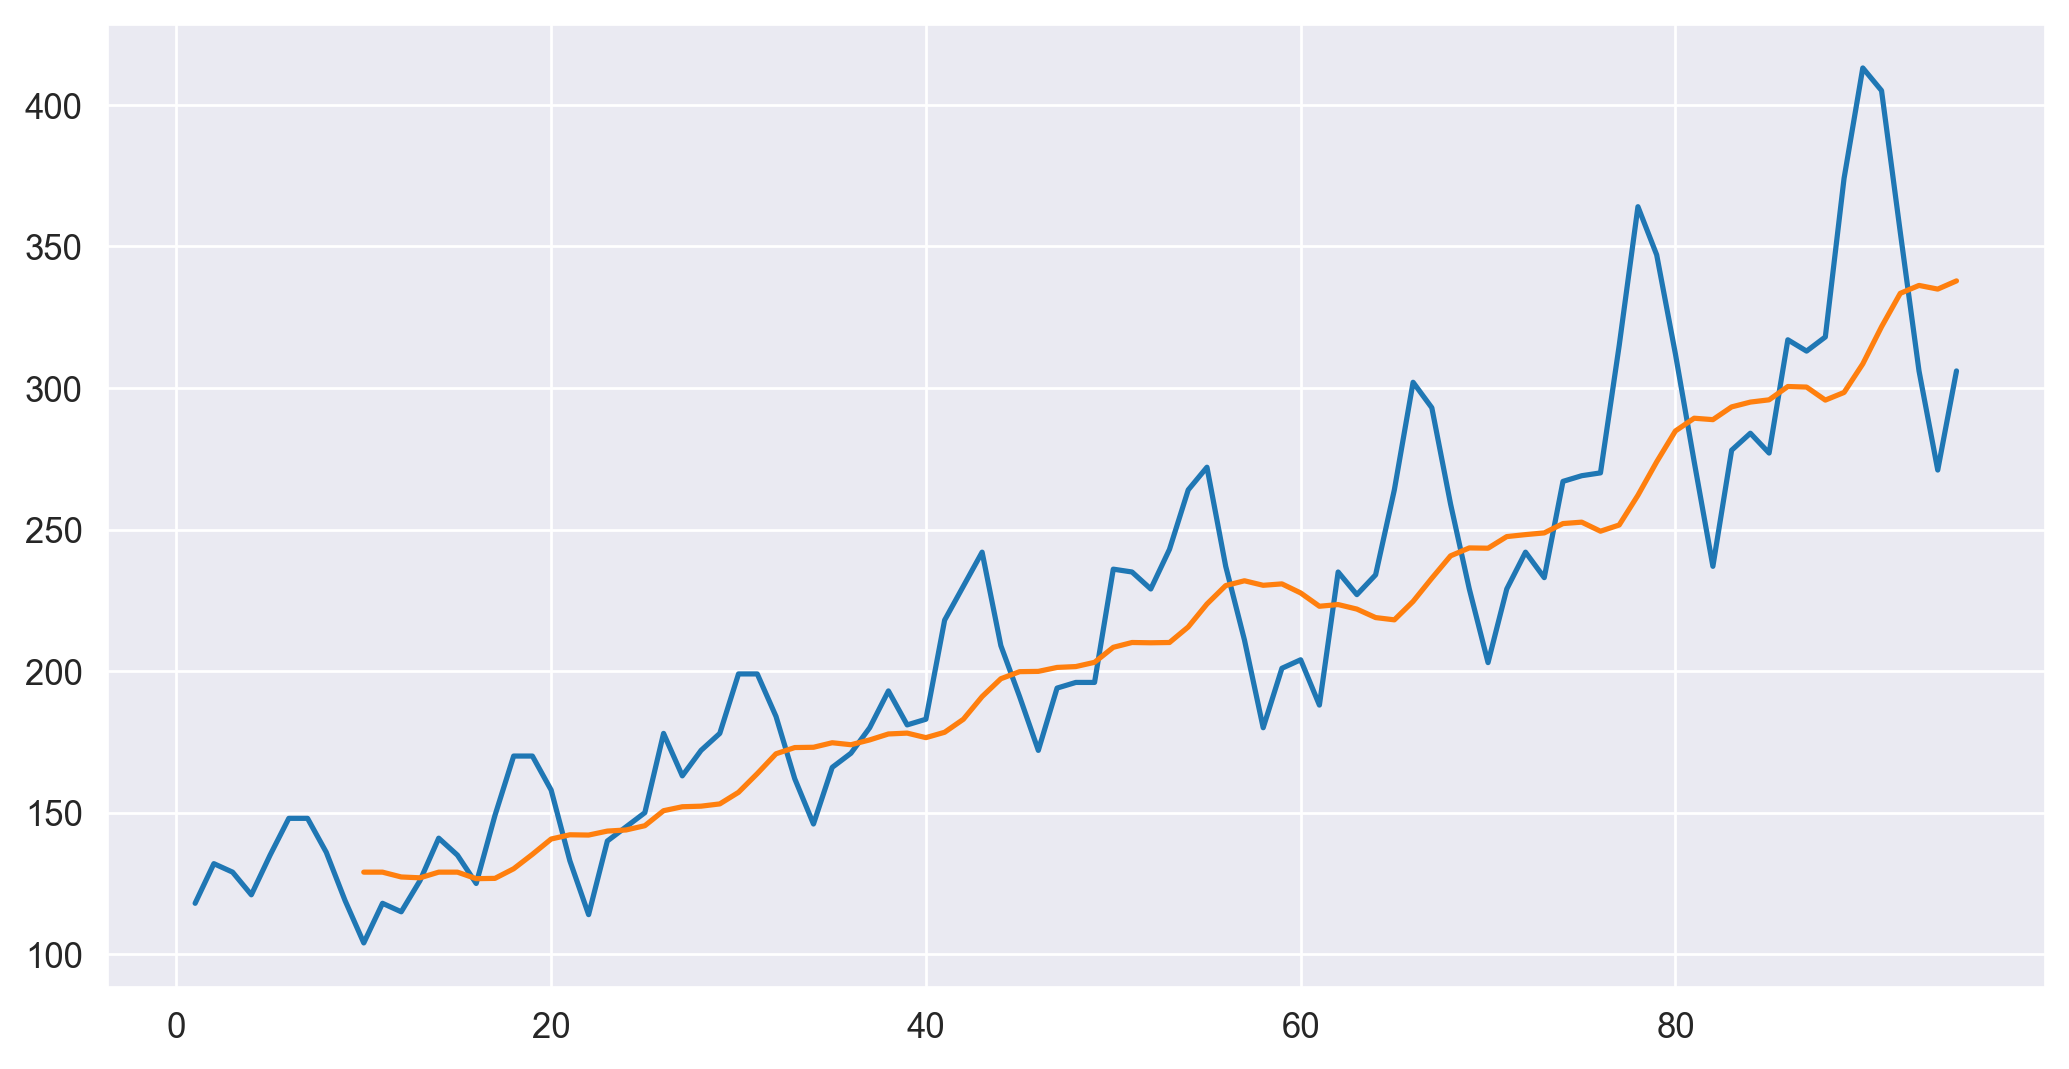

In [21]:
Data['Passengers'].plot()
Data['Passengers'].rolling(10).mean().plot()

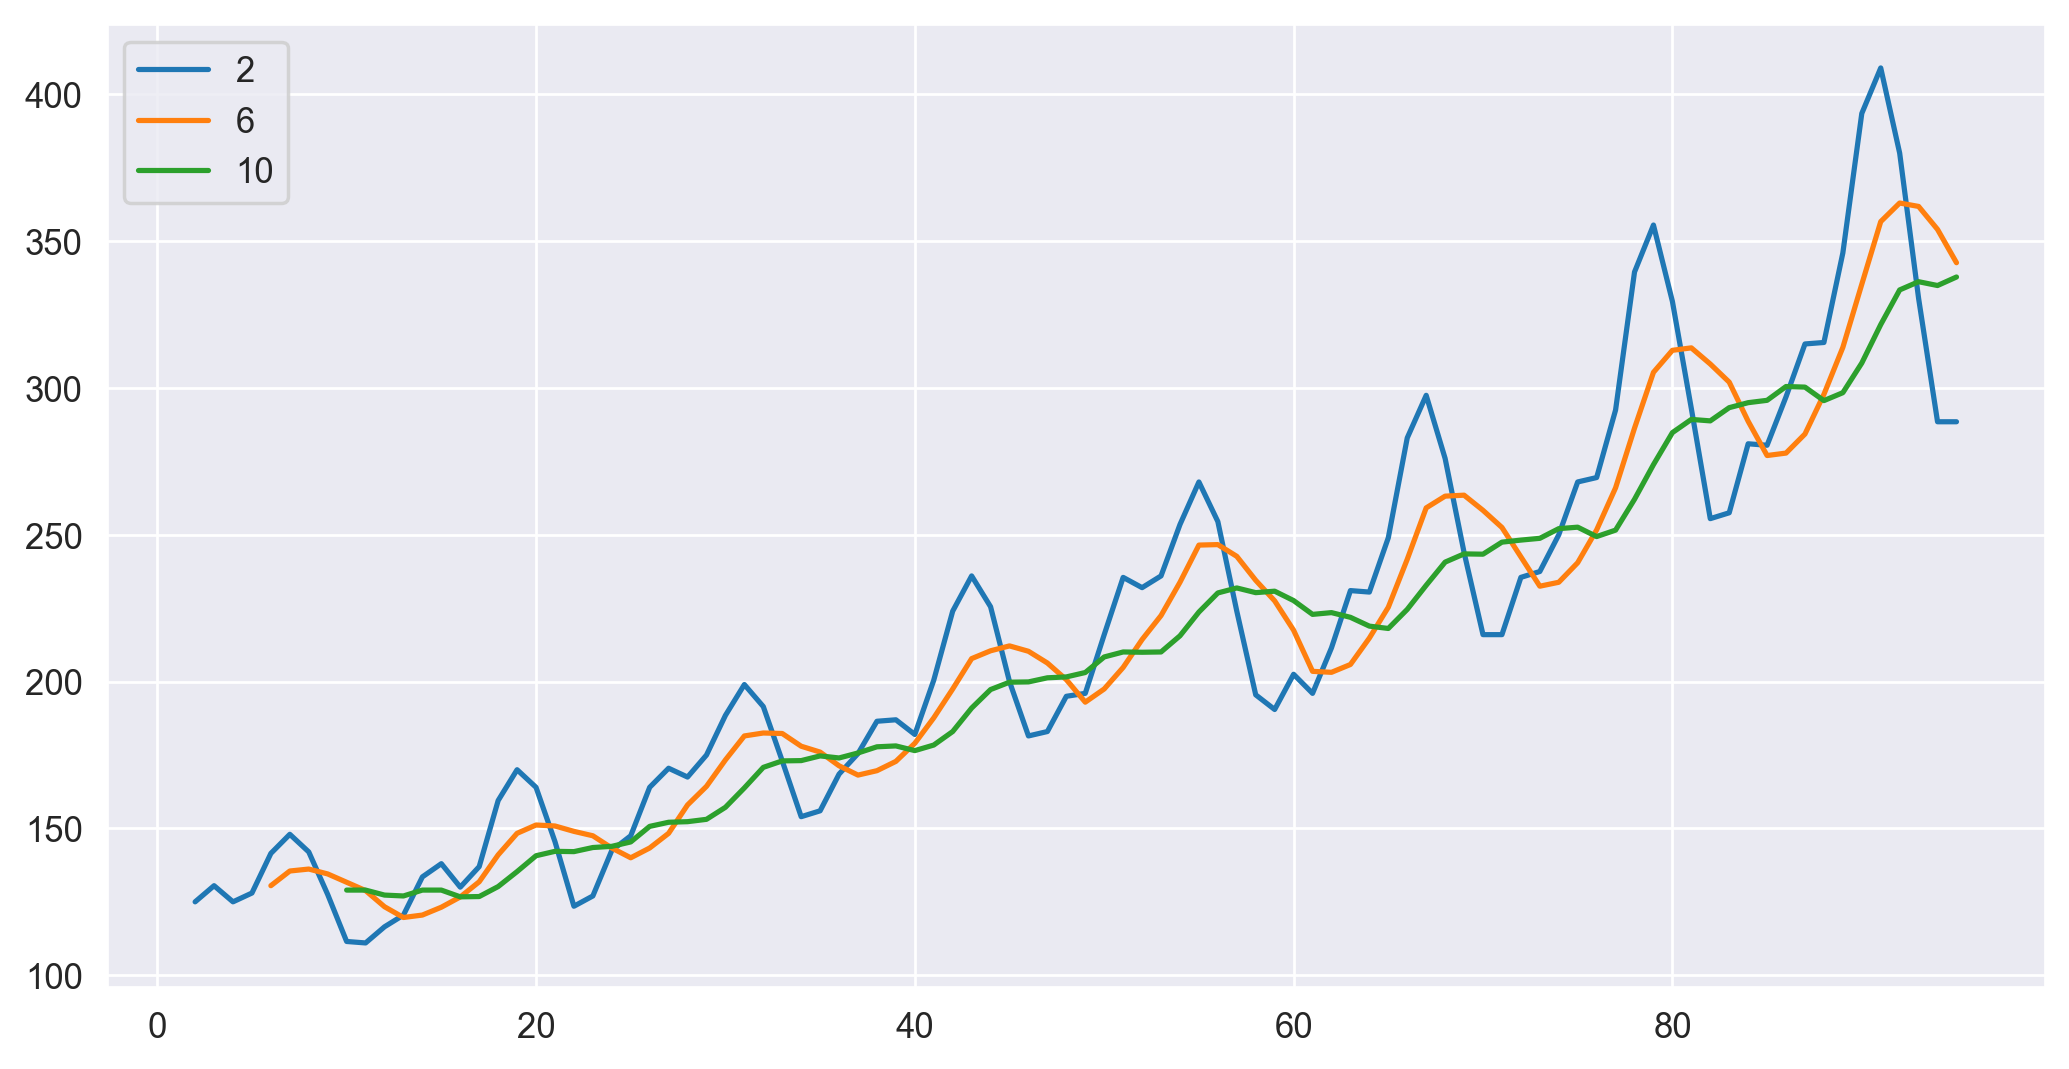

In [22]:
for i in range(2,12,4):
    Data['Passengers'].rolling(i).mean().plot(label = str(i))
    plt.legend()

In [2]:
# ARIMA library

#!pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 987.3/987.3 kB 4.5 MB/s eta 0:00:00


In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Check stationarity of the data

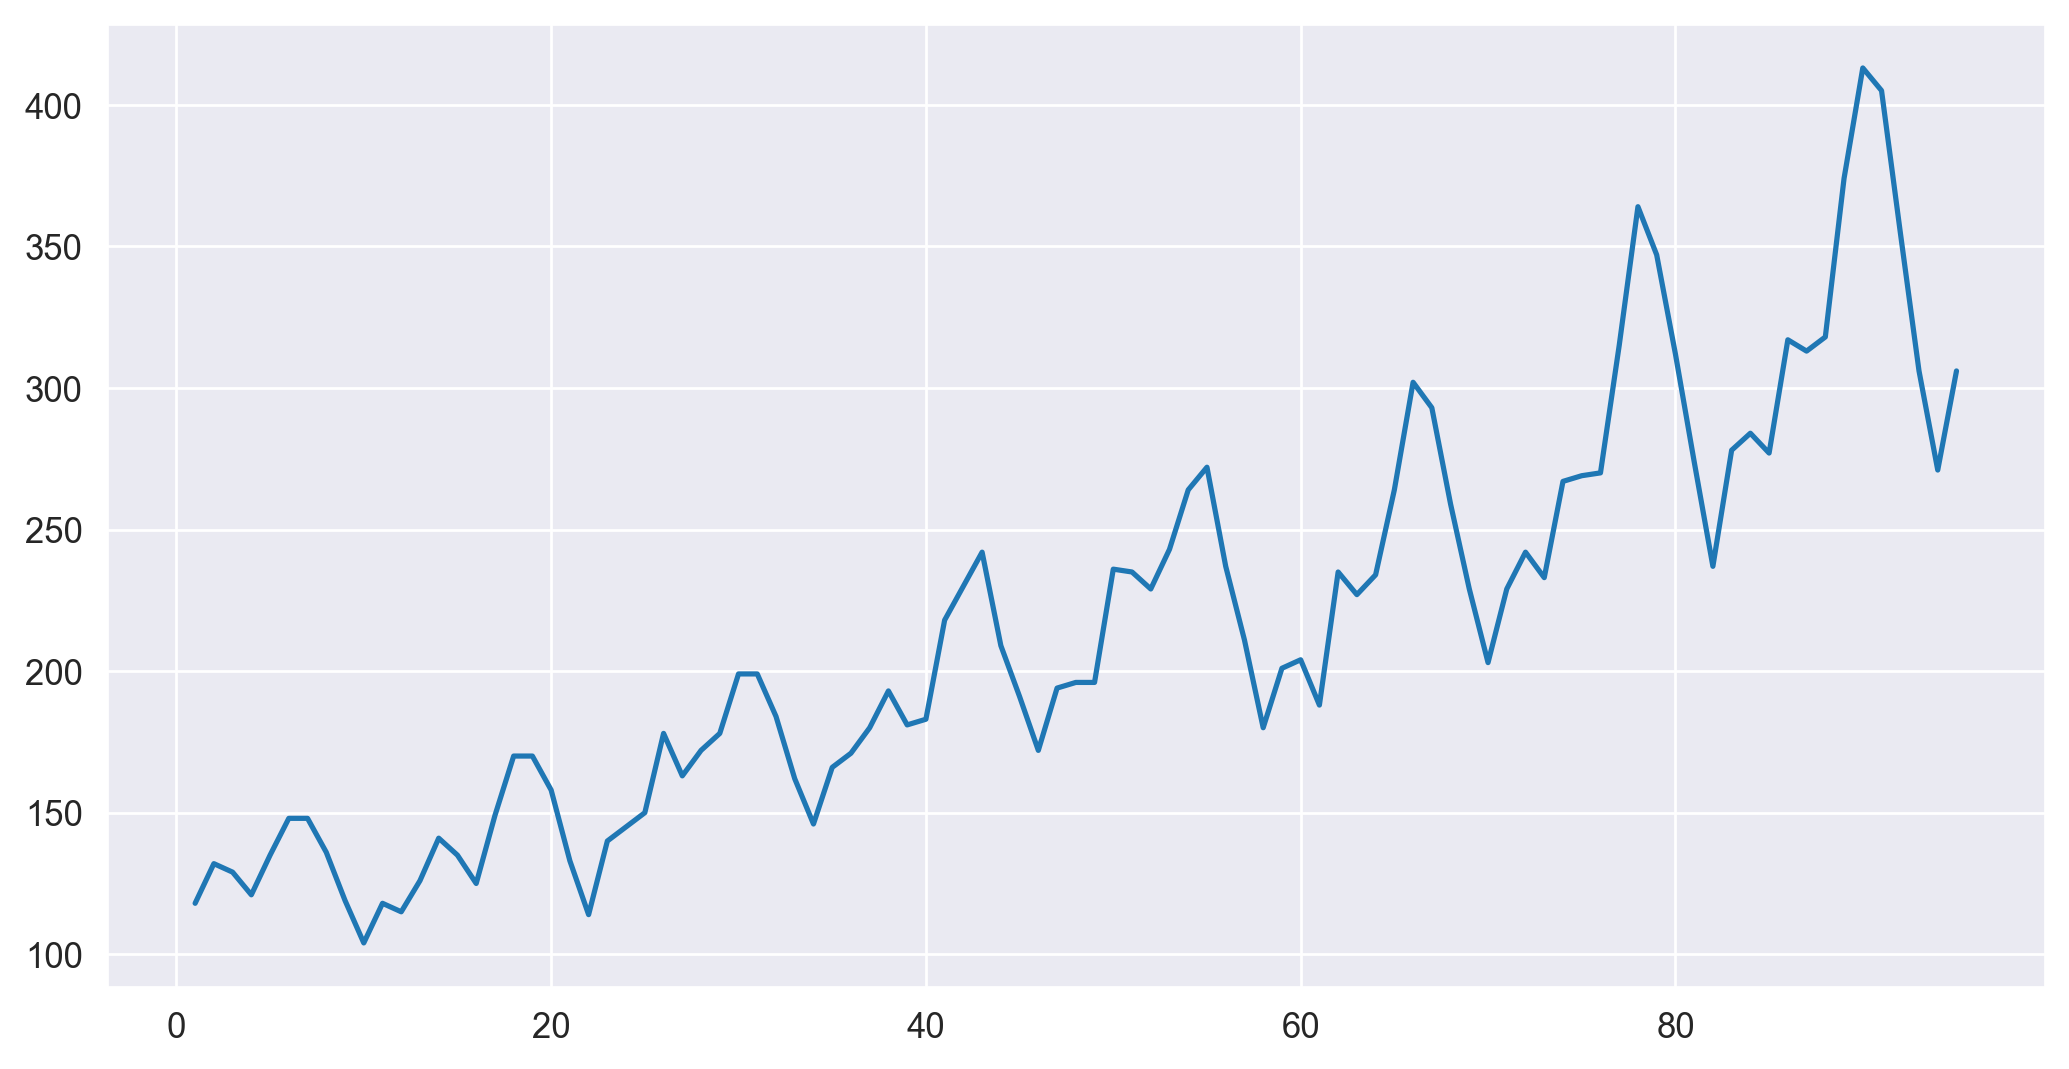

In [26]:
plt.plot(Data['Passengers'])

In [27]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(Data['Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.330143
p-value                         0.996772
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


- If p< 0.05 ; Data is stationary

- if p>0.05; Data is not stationary

According the p-value, the dataset is non-stationary as the p value is greater than alpha value.So, we can't build ARIMA Model.